In [1]:
#importing modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
df = pd.read_csv('train.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [3]:
df.isnull().sum()


Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.drop(columns=['Booking_ID'], inplace=True)

In [8]:
df.shape

(29020, 18)

In [9]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    19551
Canceled         9469
Name: count, dtype: int64

In [10]:
cat_cols = ['type_of_meal_plan','required_car_parking_space',
       'room_type_reserved','market_segment_type', 'repeated_guest','booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

# DATA ANALYSIS

In [11]:
data = df.copy()

In [12]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


# univariate analysis

In [13]:
def num_plot_dist(df , num_features):
    fig , axes = plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))
    if len(num_features)==1:
        axes=[axes]
    
    for i,column in enumerate(num_features):
        sns.histplot(data=df , x=column , ax=axes[i][0] , kde=True , palette="Blues" )
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df , x=column , ax=axes[i][1] , palette="Blues")
        axes[i][1].set_title(f"Box Plot for {column}")
    
    plt.tight_layout()
    plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_21936\3269944445.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df , x=column , ax=axes[i][0] , kde=True , palette="Blues" )
C:\Users\PC\AppData\Local\Temp\ipykernel_21936\3269944445.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df , x=column , ax=axes[i][1] , palette="Blues")
C:\Users\PC\AppData\Local\Temp\ipykernel_21936\3269944445.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df , x=column , ax=axes[i][0] , kde=True , palette="Blues" )
C:\Users\PC\AppData\Local\Temp\ipykernel_21936\3269944445.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same e

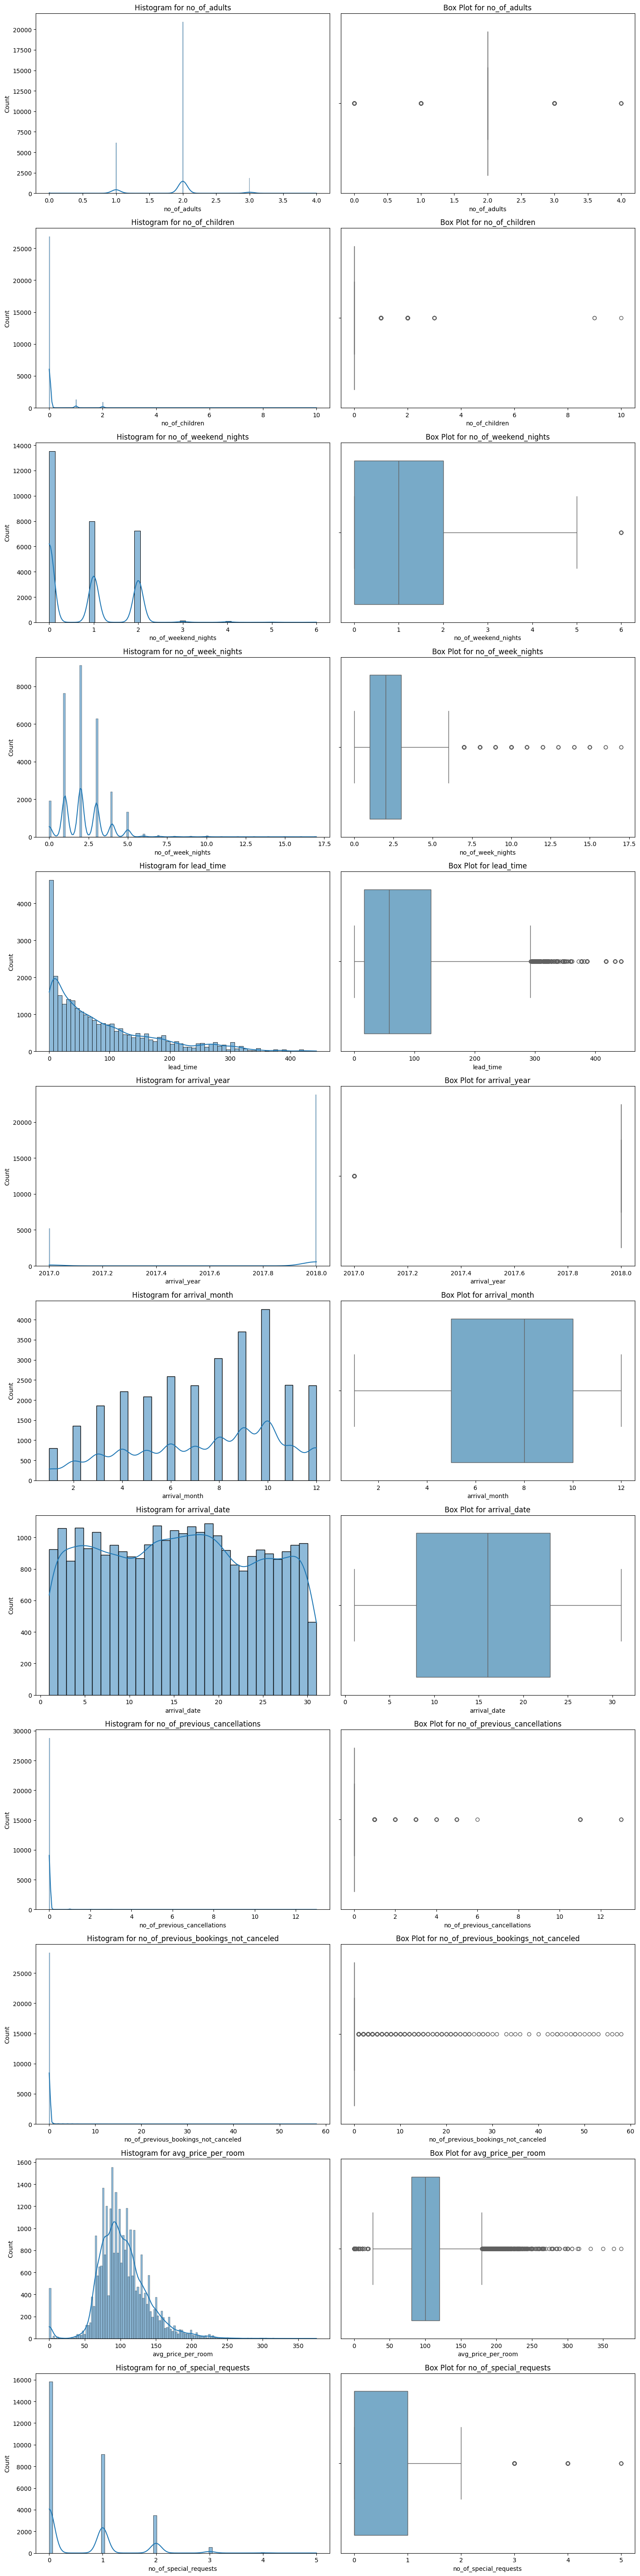

In [14]:
num_plot_dist(data , num_cols)

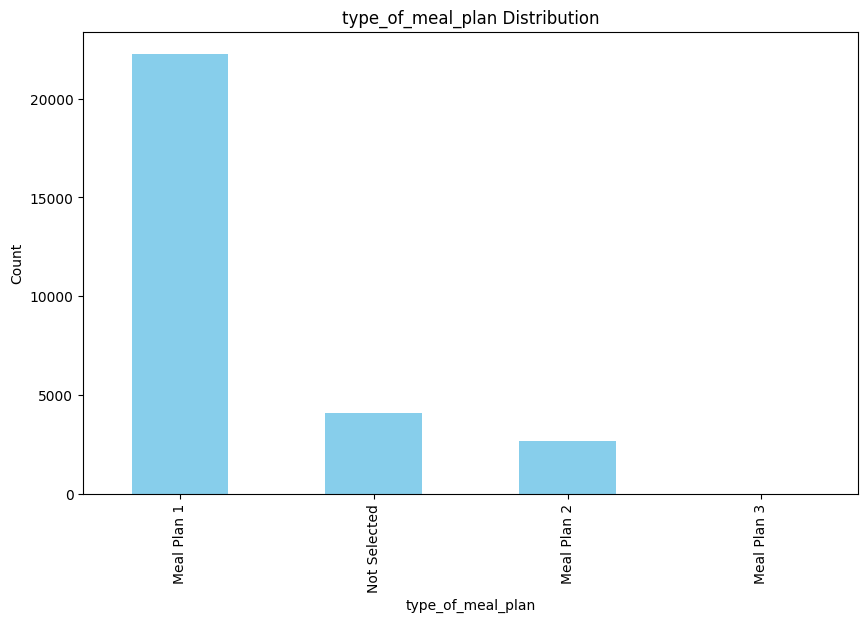

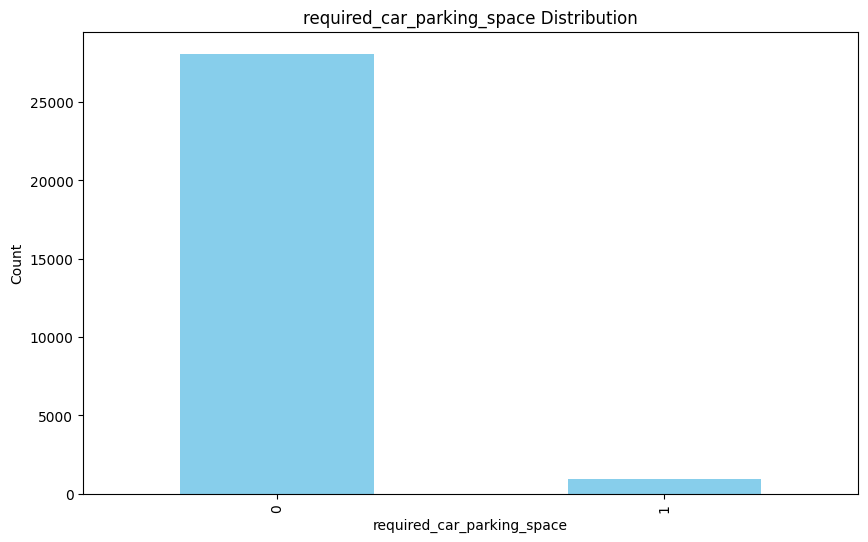

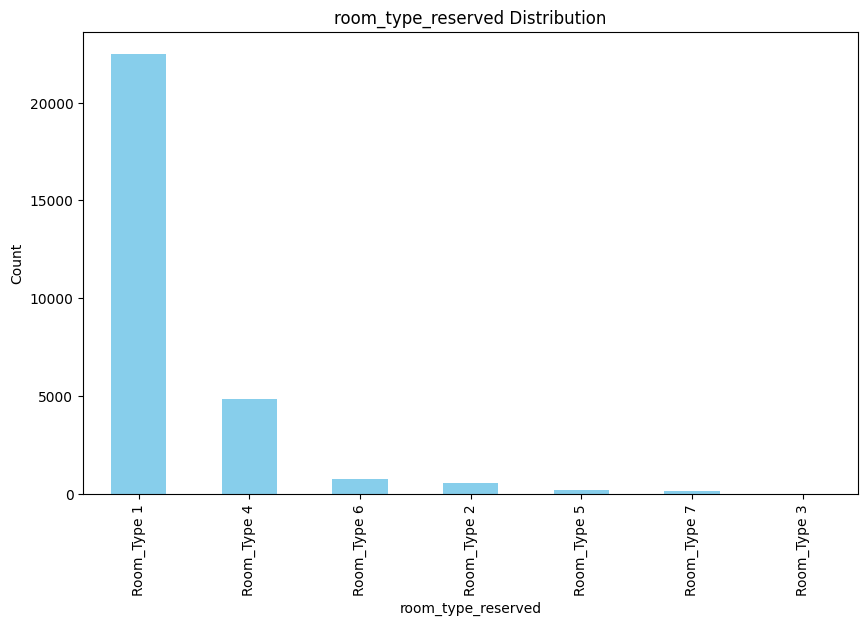

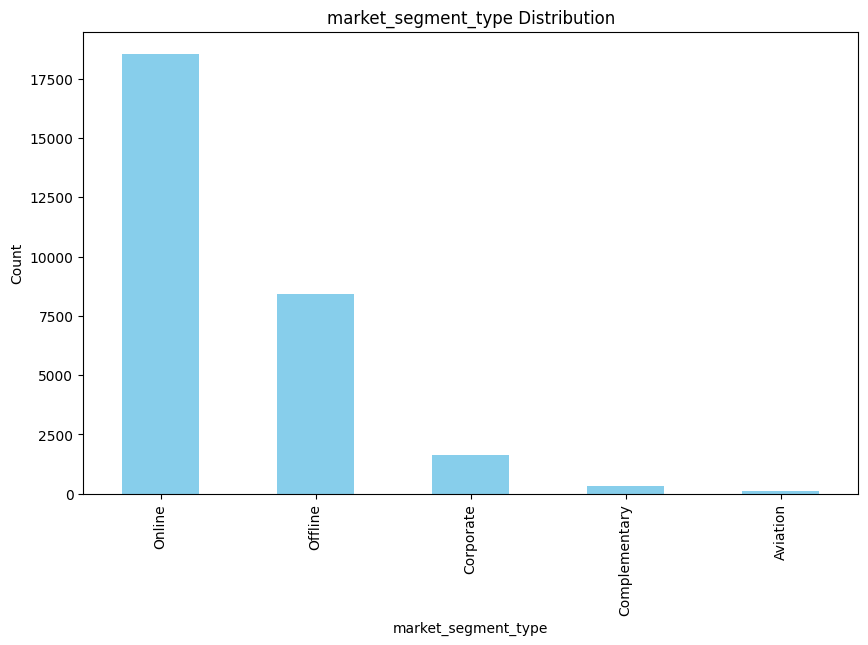

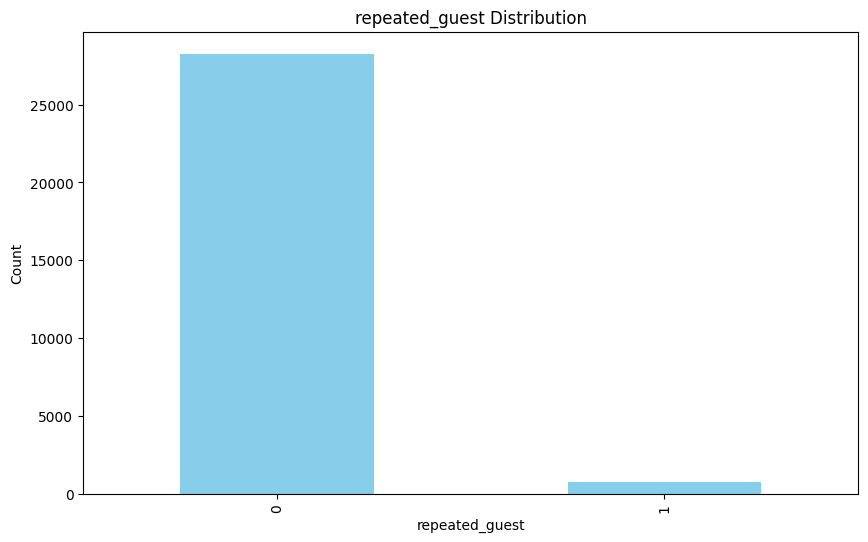

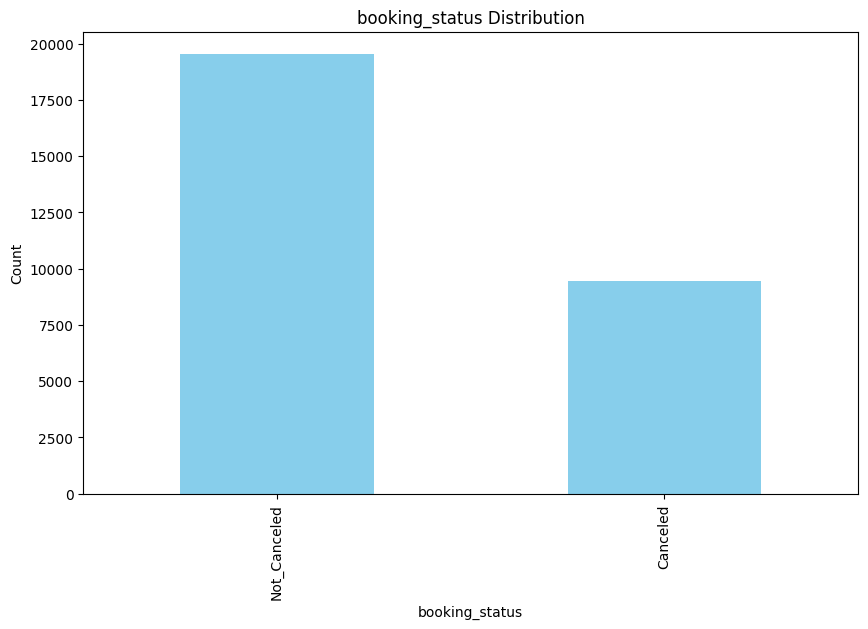

In [15]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar' , color='skyblue')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

# BIVARIATE ANALYSIS

In [16]:
def plot_bivariate_num(df , target , num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i , column in enumerate(num_features):
        sns.boxplot(x=target,y=column,ax=axes[i] , data=df , palette="Blues")
        axes[i].set_title(f"{column}  VS {target}")

    plt.tight_layout()
    plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_21936\2256793722.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target,y=column,ax=axes[i] , data=df , palette="Blues")
C:\Users\PC\AppData\Local\Temp\ipykernel_21936\2256793722.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target,y=column,ax=axes[i] , data=df , palette="Blues")
C:\Users\PC\AppData\Local\Temp\ipykernel_21936\2256793722.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target,y=column,ax=axes[i] , data=df , palette="Blues")
C:\Users\PC\AppData\Local\Temp\ipykernel_21

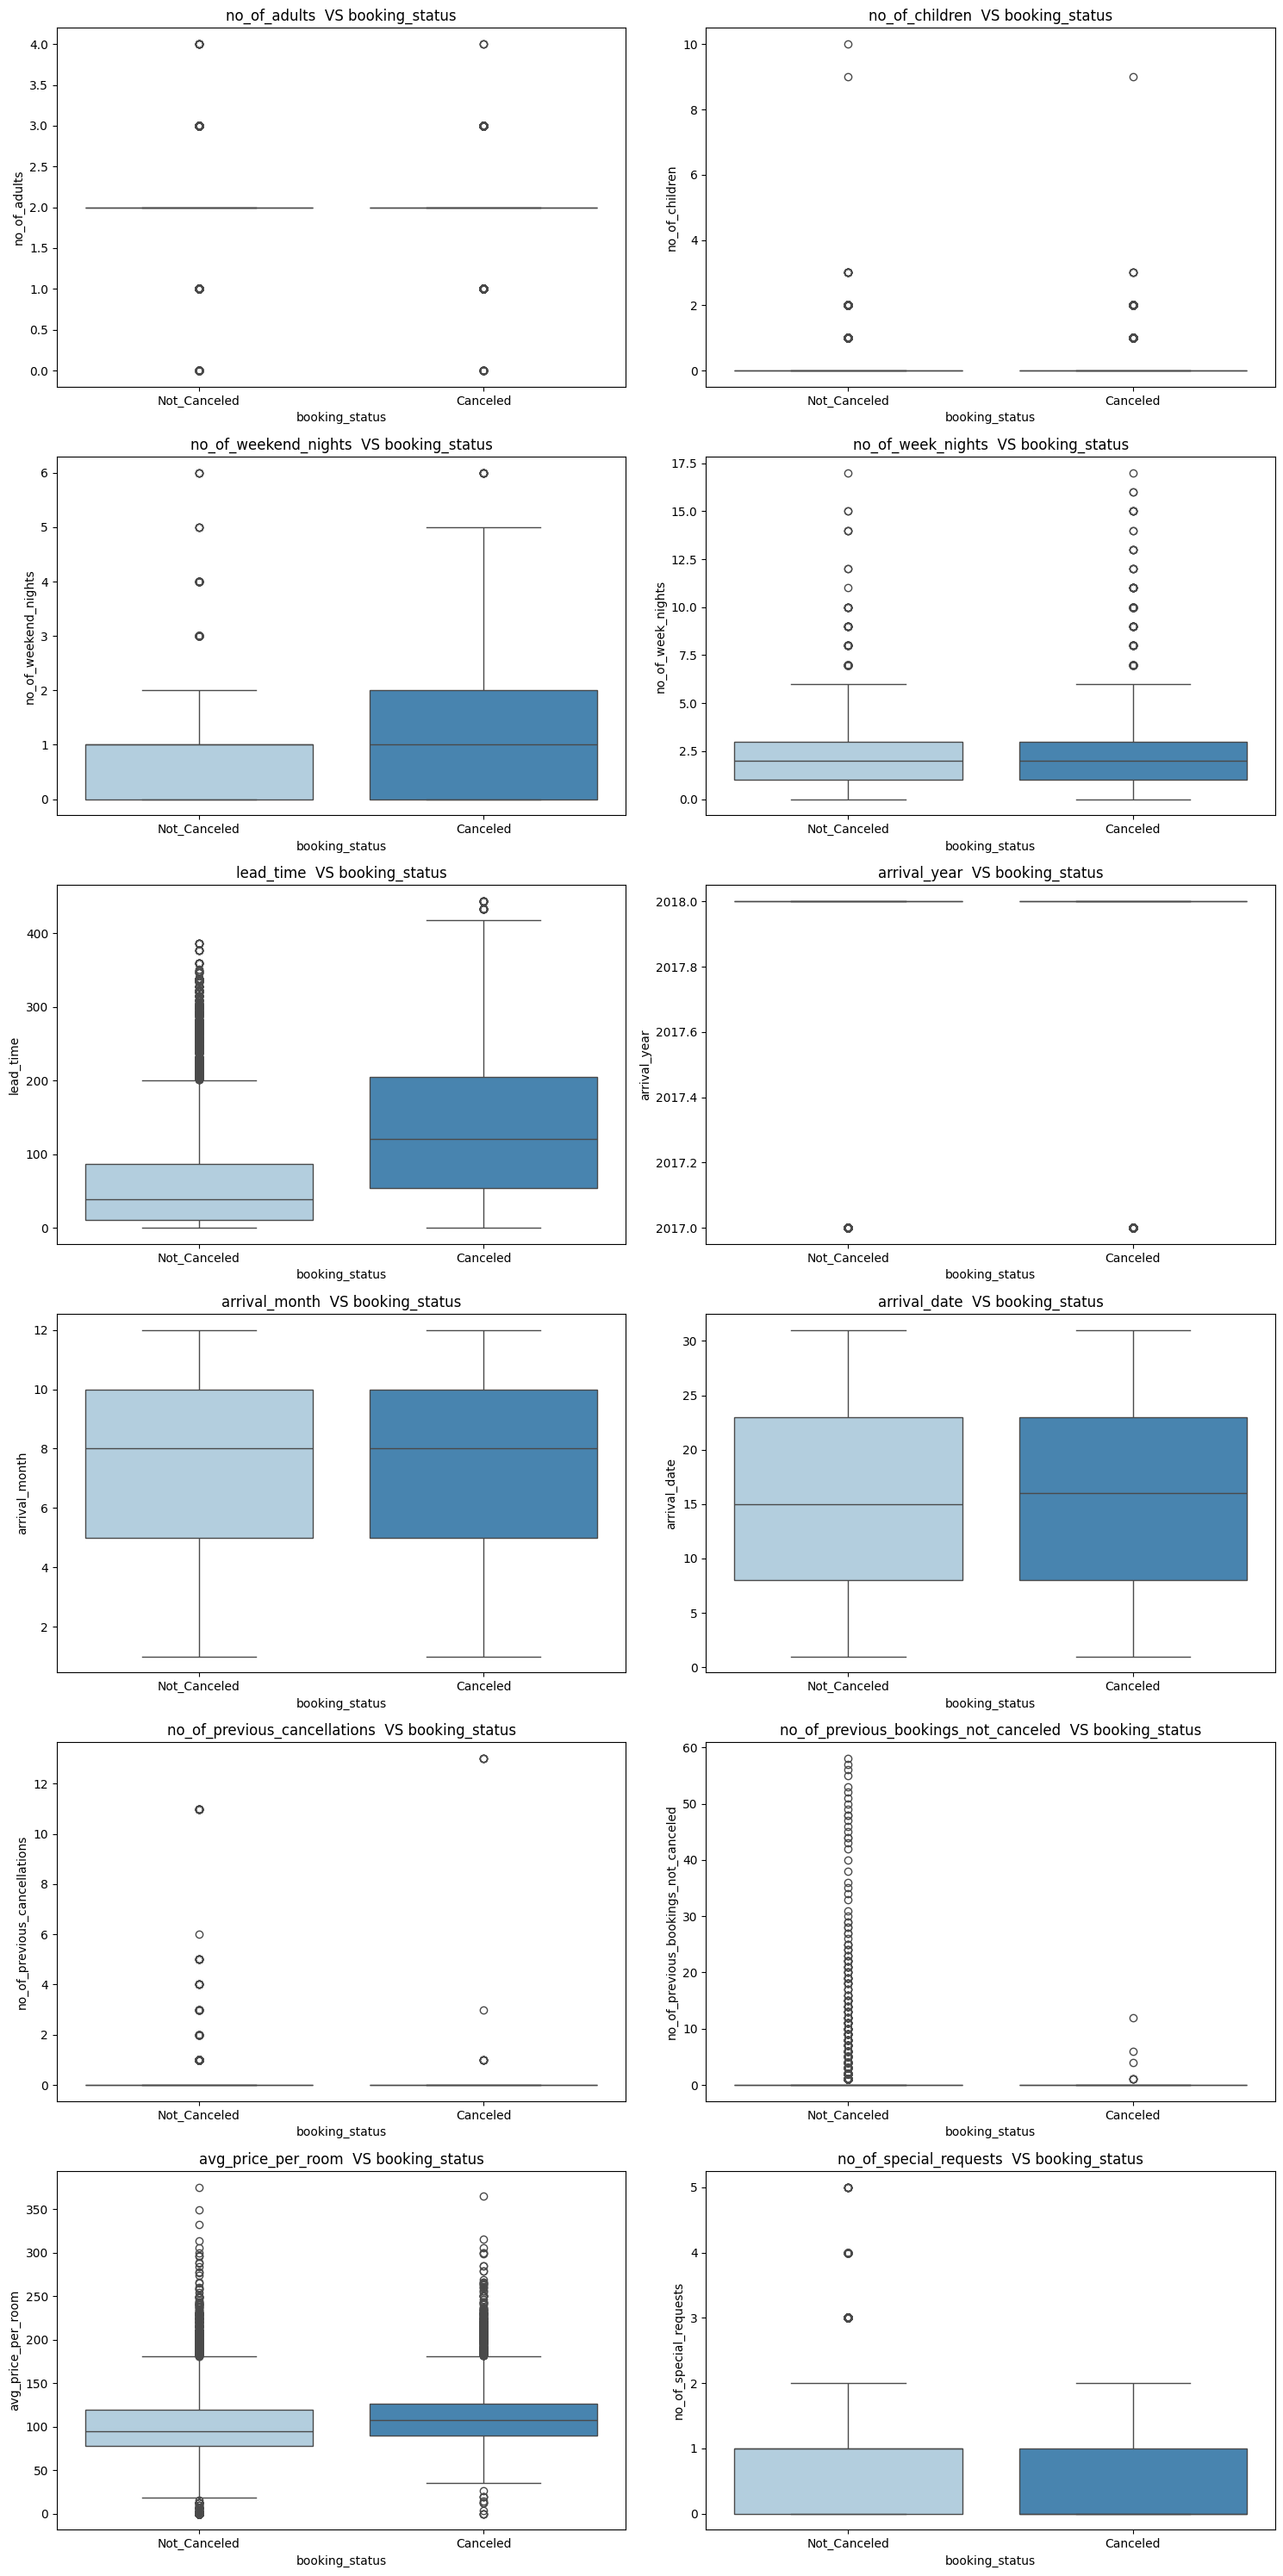

In [17]:
plot_bivariate_num(data , 'booking_status' , num_cols)

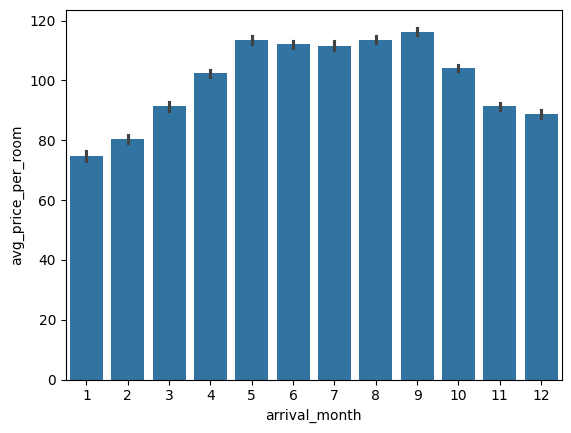

In [18]:
sns.barplot(x='arrival_month' , y="avg_price_per_room" , data=data)
plt.show()

In [19]:
def plot_bivaraite_cat(df , target , cat_features):

    num_features = len(cat_features)
    num_rows = (num_features+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i,feature in enumerate(cat_features):
        sns.countplot(x=feature , hue=target ,data=df , palette="Set2" , ax = axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis='x' , rotation=90)

    plt.tight_layout()
    plt.show()

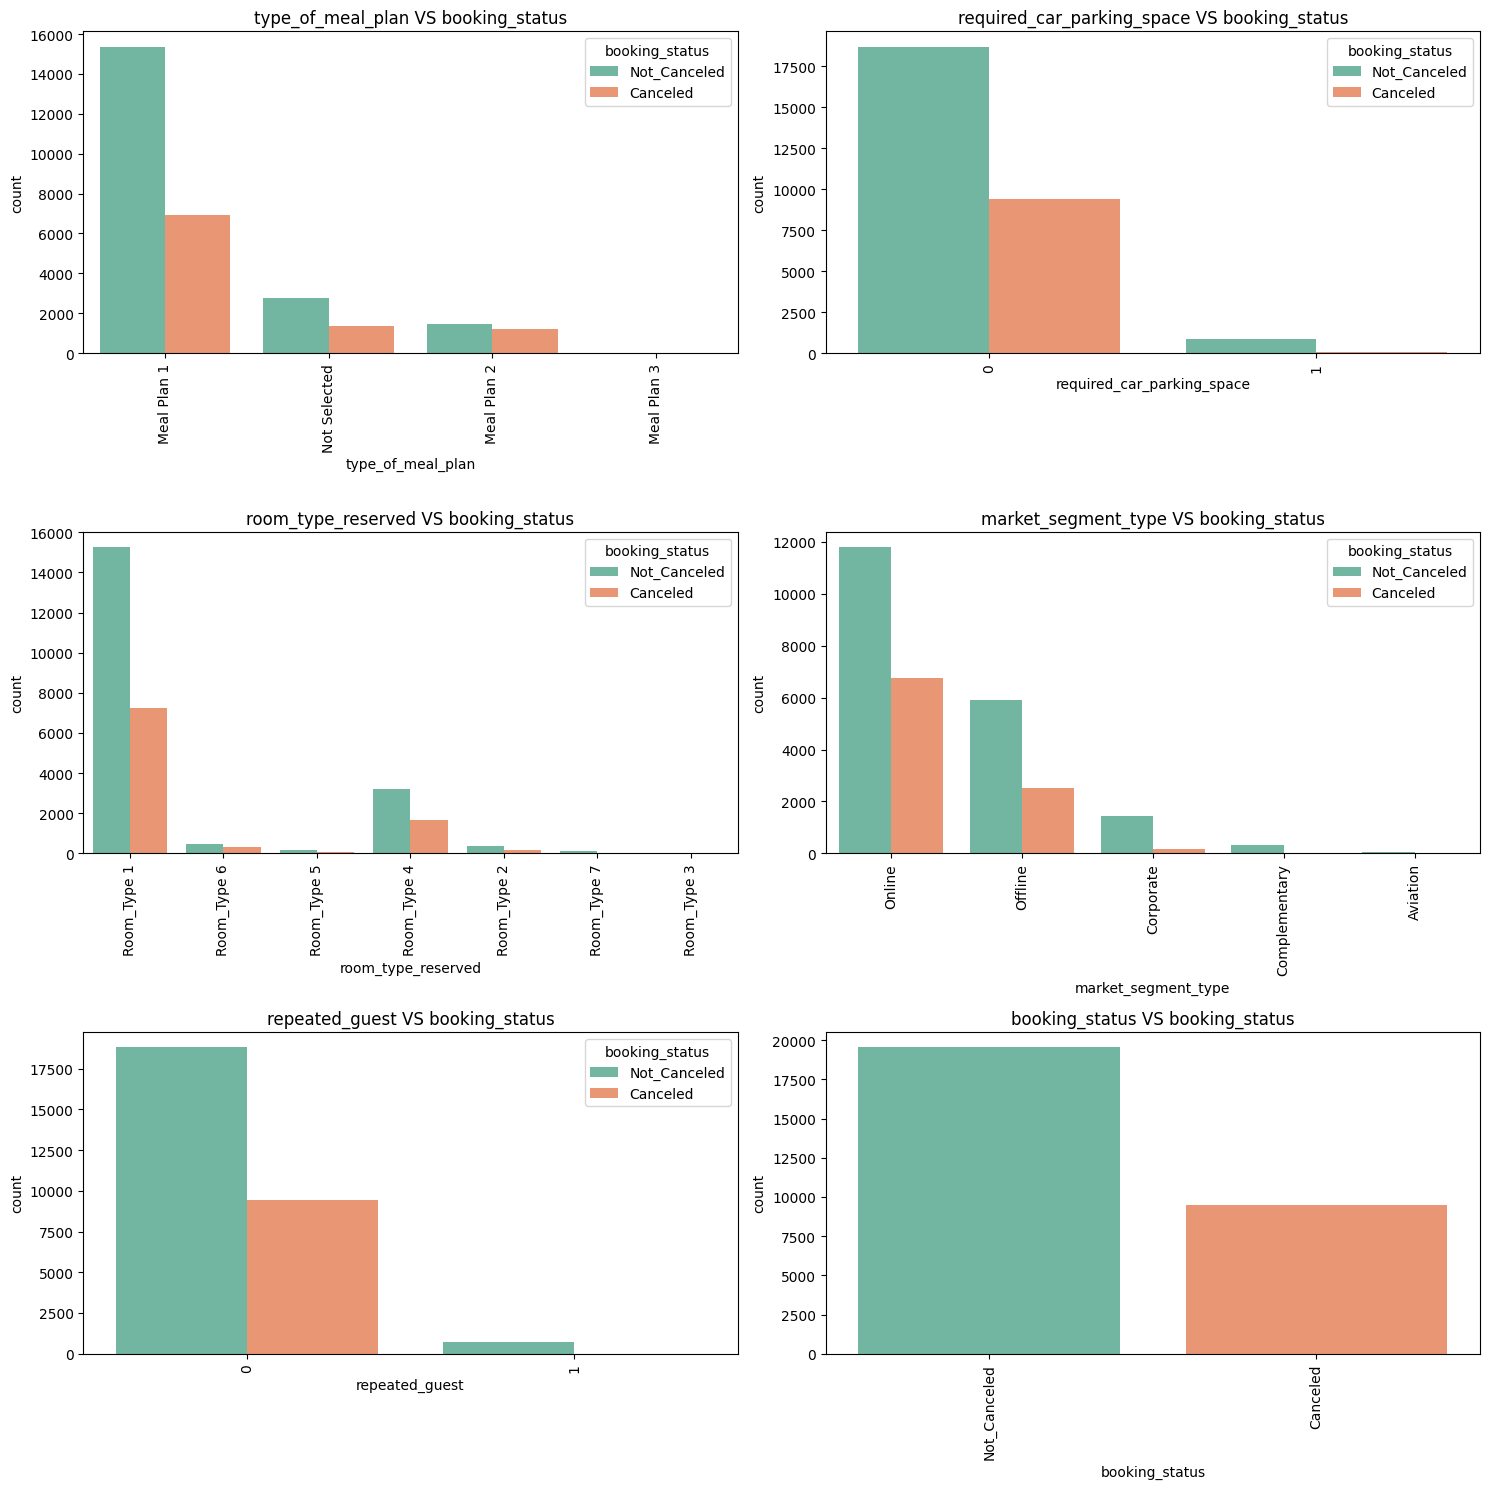

In [20]:
plot_bivaraite_cat(data , 'booking_status' , cat_cols)

# DATA PROCESSING

In [21]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29020 non-null  int64  
 1   no_of_children                        29020 non-null  int64  
 2   no_of_weekend_nights                  29020 non-null  int64  
 3   no_of_week_nights                     29020 non-null  int64  
 4   type_of_meal_plan                     29020 non-null  object 
 5   required_car_parking_space            29020 non-null  int64  
 6   room_type_reserved                    29020 non-null  object 
 7   lead_time                             29020 non-null  int64  
 8   arrival_year                          29020 non-null  int64  
 9   arrival_month                         29020 non-null  int64  
 10  arrival_date                          29020 non-null  int64  
 11  market_segment_

In [23]:
##### Label encoding
from sklearn.preprocessing import LabelEncoder

In [24]:
label_encoder = LabelEncoder()

mappings={}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

    mappings[col] = {label:code for label,code in zip(label_encoder.classes_ , label_encoder.transform(label_encoder.classes_))}
   

In [25]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [26]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29020 non-null  int64  
 1   no_of_children                        29020 non-null  int64  
 2   no_of_weekend_nights                  29020 non-null  int64  
 3   no_of_week_nights                     29020 non-null  int64  
 4   type_of_meal_plan                     29020 non-null  int64  
 5   required_car_parking_space            29020 non-null  int64  
 6   room_type_reserved                    29020 non-null  int64  
 7   lead_time                             29020 non-null  int64  
 8   arrival_year                          29020 non-null  int64  
 9   arrival_month                         29020 non-null  int64  
 10  arrival_date                          29020 non-null  int64  
 11  market_segment_

In [28]:
### Multicollinearity

In [29]:
!pip install statsmodels


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [31]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [32]:
vif_data

,feature,VIF
0,const,3.585767e+07
1,no_of_adults,1.295419e+00
2,no_of_children,1.257749e+00
3,no_of_weekend_nights,1.062324e+00
4,no_of_week_nights,1.086849e+00
5,type_of_meal_plan,1.155976e+00
6,required_car_parking_space,1.036866e+00
7,room_type_reserved,1.530014e+00
8,lead_time,1.440424e+00
9,arrival_year,1.297431e+00


# our data don't have any multicollinearity

In [33]:
corr = df.corr()

In [34]:
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.023206,0.105348,0.107088,0.025929,0.012601,0.270178,0.096849,0.076599,0.018676,0.021653,0.311844,-0.193910,-0.047723,-0.119168,0.298806,0.186752,-0.091468
no_of_children,-0.023206,1.000000,0.029363,0.027730,-0.085639,0.031156,0.359788,-0.046830,0.049156,-0.003387,0.028185,0.135077,-0.036217,-0.016429,-0.021245,0.339916,0.126538,-0.030347
no_of_weekend_nights,0.105348,0.029363,1.000000,0.170348,-0.027533,-0.034955,0.058160,0.044089,0.052698,-0.011612,0.029413,0.127151,-0.066445,-0.020146,-0.027981,-0.007783,0.059582,-0.056956
no_of_week_nights,0.107088,0.027730,0.170348,1.000000,-0.078791,-0.051730,0.095343,0.154032,0.036798,0.037856,-0.007459,0.111961,-0.097529,-0.029076,-0.044622,0.024255,0.045760,-0.093921
type_of_meal_plan,0.025929,-0.085639,-0.027533,-0.078791,1.000000,-0.015095,-0.208296,-0.064028,0.069515,0.008640,0.005035,0.204802,-0.066835,-0.016406,-0.038117,-0.066362,0.020935,-0.027236
required_car_parking_space,0.012601,0.031156,-0.034955,-0.051730,-0.015095,1.000000,0.036740,-0.069882,0.021166,-0.017233,-0.003162,-0.004110,0.117608,0.026509,0.071711,0.059450,0.091292,0.090892
room_type_reserved,0.270178,0.359788,0.058160,0.095343,-0.208296,0.036740,1.000000,-0.106759,0.105152,-0.004403,0.028684,0.157289,-0.027335,-0.008770,-0.012025,0.472436,0.141985,-0.023396
lead_time,0.096849,-0.046830,0.044089,0.154032,-0.064028,-0.069882,-0.106759,1.000000,0.141433,0.134737,0.002029,-0.008181,-0.138162,-0.045136,-0.078447,-0.064011,-0.101831,-0.434425
arrival_year,0.076599,0.049156,0.052698,0.036798,0.069515,0.021166,0.105152,0.141433,1.000000,-0.339353,0.016373,0.149341,-0.017384,0.005358,0.026980,0.176304,0.058387,-0.173351
arrival_month,0.018676,-0.003387,-0.011612,0.037856,0.008640,-0.017233,-0.004403,0.134737,-0.339353,1.000000,-0.043967,-0.009681,0.005575,-0.037577,-0.005398,0.056038,0.108712,0.012487


<Axes: >

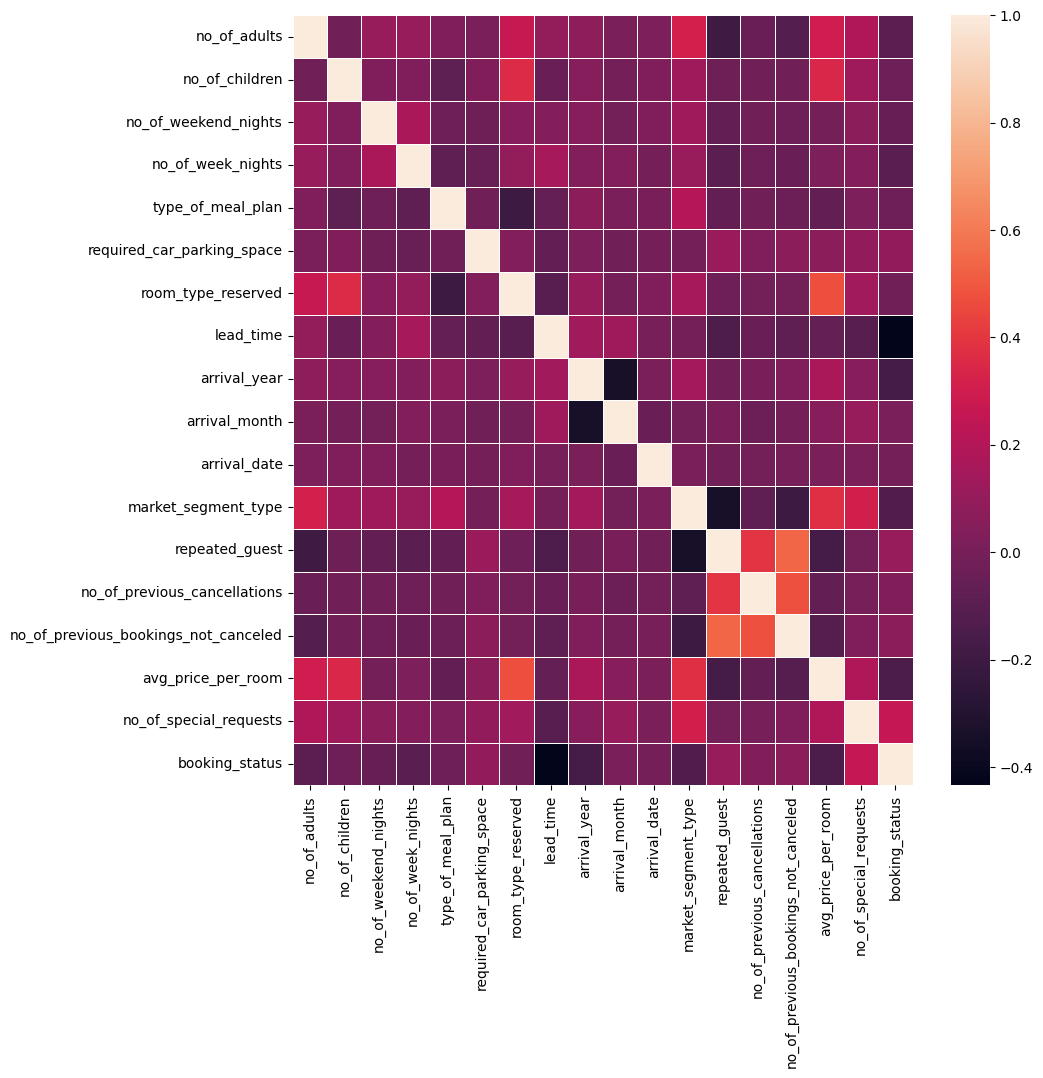

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(corr , linewidths=0.5)

In [36]:
skewness  = df.skew()
skewness

no_of_adults                            -0.340838
no_of_children                           4.844412
no_of_weekend_nights                     0.719426
no_of_week_nights                        1.542808
type_of_meal_plan                        1.806612
required_car_parking_space               5.323647
room_type_reserved                       1.729866
lead_time                                1.289144
arrival_year                            -1.669774
arrival_month                           -0.346711
arrival_date                             0.027335
market_segment_type                     -1.670290
repeated_guest                           5.985562
no_of_previous_cancellations            24.940984
no_of_previous_bookings_not_canceled    19.509733
avg_price_per_room                       0.623772
no_of_special_requests                   1.150448
booking_status                          -0.741025
dtype: float64

In [37]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [38]:
#### Imablanced Data

In [39]:
df["booking_status"].value_counts()

booking_status
1    19551
0     9469
Name: count, dtype: int64

In [40]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [41]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [42]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
y.value_counts()

booking_status
1    19551
0     9469
Name: count, dtype: int64

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
smote = SMOTE(random_state=42)

X_res , y_res = smote.fit_resample(X,y)

In [46]:
y_res

0        1
1        1
2        0
3        1
4        0
        ..
39097    0
39098    0
39099    0
39100    0
39101    0
Name: booking_status, Length: 39102, dtype: int64

In [47]:
y_res.value_counts()

booking_status
1    19551
0    19551
Name: count, dtype: int64

In [48]:
balanced_df = pd.DataFrame(X_res , columns=X.columns)
balanced_df["booking_status"] = y_res

In [49]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0.0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0.0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0.0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0.0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0.0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [50]:
balanced_df.shape

(39102, 18)

In [51]:
df = balanced_df.copy()

In [52]:
df.shape

(39102, 18)

In [53]:
#### Feature Selection

In [54]:
len(df.columns)

18

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [57]:
model =  RandomForestClassifier(random_state=42)
model.fit(X,y)

RandomForestClassifier(random_state=42)

In [58]:
feature_importance = model.feature_importances_

In [59]:
feature_importance_df = pd.DataFrame({
    'feature':X.columns,
    'importance':feature_importance
})

In [60]:
top_features_importance_df = feature_importance_df.sort_values(by="importance" , ascending=False)

In [61]:
top_10_features = top_features_importance_df["feature"].head(10).values

top_10_df = df[top_10_features.tolist() + ["booking_status"]]

In [62]:
top_10_df.head()

,lead_time,avg_price_per_room,no_of_special_requests,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,arrival_year,no_of_adults,booking_status
0,26,161.00,0,10,17,4,1,2,2017,2,1
1,98,121.50,2,7,16,4,1,1,2018,2,1
2,433,70.00,0,9,8,3,3,0,2018,2,0
3,195,72.25,0,8,8,3,5,2,2018,2,1
4,188,130.00,0,6,15,3,2,0,2018,1,0


In [63]:
len(top_10_df.columns)

11

In [64]:
df = top_10_df.copy()

# Model Selection

In [65]:
!pip install xgboost lightgbm

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 991.0 kB/s eta 0:02:32
   ---------------------------------------- 0.1/150.0 MB 1.4 MB/s eta 0:01:44
   ---------------------------------------- 0.2/150.0 MB 2.0 MB/s eta 0:01:14
   ---------------------------------------- 0.4/150.0 MB 2.1 MB/s eta 0:01:10
   ---------------------------------------- 0.5/150.0 MB 2.3 MB/s eta 0:01:05
   ---------------------------------------- 0.6/150.0 MB 2.3 MB/s eta 0:01:06
   ---------------------------------------- 0.7/150.0 MB 2.3 MB/s eta 0:01:05
   ---------------------------------------- 0.7/150.0 MB 2.2 MB/s eta 0:01:07
   ---------------------------------------- 0.8/150.0 MB 2.2 MB/s eta 0:01:08
   ---------------------------------------- 0.9/150.0 MB 2.2 MB/s eta 0:01:08
   ---------------------------------------- 1.0/150.0 MB 2.3 MB/s eta 0:01:06
   ---------------------------------------- 1.1/150.0 MB 2.2 MB/s eta


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [67]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [68]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [69]:
classifiers = {
    "Random Forest" : RandomForestClassifier(random_state=42),
    "LogisticRegression" : LogisticRegression(random_state=42),
    "Gradient Boosting" : GradientBoostingClassifier(random_state=42),
    "Suuport vector classifier" : SVC(random_state=42),
    "Decsion Tree" : DecisionTreeClassifier(random_state=42),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "XGboost" : XGBClassifier(random_state=42),
    "Adaboost" : AdaBoostClassifier(random_state=42),
    "LGBM" : LGBMClassifier(random_state=42) 
}

In [70]:
metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 Score" : []
}

In [71]:
for model_name,classifier in classifiers.items():
    classifier.fit(X_train,y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)

c:\Users\PC\Desktop\courses\End-to-end-MLOps\hotel_reservations_end-end\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 15649, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000805 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 31281, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500272 -> initscore=0.001087
[LightGBM] [Info] Start training from score 0.001087


In [72]:
metrics_df= pd.DataFrame(metrics)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.914333,0.909944,0.919272,0.914584
1,LogisticRegression,0.799642,0.810258,0.781394,0.795564
2,Gradient Boosting,0.841452,0.844283,0.836494,0.840371
3,Suuport vector classifier,0.695180,0.661078,0.798309,0.723241
4,Decsion Tree,0.881984,0.884189,0.878524,0.881347
5,KNN,0.832119,0.857498,0.795746,0.825469
6,Naive Bayes,0.755019,0.775527,0.716299,0.744738
7,XGboost,0.896944,0.895100,0.898770,0.896931
8,Adaboost,0.803734,0.826663,0.767555,0.796013
9,LGBM,0.887610,0.881403,0.895182,0.888239


In [ ]:
####### TRAIN OUR RF MODEL

In [73]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [74]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [75]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [76]:
rf = RandomForestClassifier(random_state=42)

In [77]:
params_dist={
    'n_estimators' : randint(100,500),
    'max_depth' : randint(10,50),
    'min_samples_split': randint(2,10),
    'min_samples_leaf' : randint(1,5),
    'bootstrap' : [True , False] 
}

In [78]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [79]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.9s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.9s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.9s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.4s
[CV]

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025ADBB59B20>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025ADDCE3FB0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025ADDCE04D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025AE33B1010>},
                   random_state=42, scoring='accuracy', verbose=2)

In [80]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [81]:
best_rf_model = random_search.best_estimator_

In [82]:
y_pred = best_rf_model.predict(X_test)

In [83]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [84]:
accuracy

0.9112645441759366

In [85]:
precision

0.9050505050505051

In [86]:
recall

0.9185033316248078

In [87]:
f1

0.9117272958534725

In [88]:
### Save this model

In [89]:
import joblib

In [90]:
joblib.dump(best_rf_model,"random_forest.pkl")

['random_forest.pkl']

In [91]:
loaded_model=joblib.load("random_forest.pkl")

In [92]:
X_train[0:1]

,lead_time,avg_price_per_room,no_of_special_requests,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,arrival_year,no_of_adults
3047,47,91.8,0,3,10,4,3,0,2018,2


In [93]:
new_data = np.array([190,1 ,	93.5,	9	,8,	4,	5,	2,	0,	0]).reshape(1,-1)

In [95]:
predictions=loaded_model.predict(new_data)
predictions

c:\Users\PC\Desktop\courses\End-to-end-MLOps\hotel_reservations_end-end\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])